In [2]:
import os
import json
import matplotlib.pyplot as plt

In [3]:
save_path = "./new/v2"
layers = [3, 5, 7, 10]
colors = ["black", "blue", "crimson","teal"] 
x_label = "Solution cost"
y_label = "Frequency of solution"

In [4]:
path = "../results/json/cob"
files = os.listdir(path)
files.sort()
temp = files.pop(0)
files.append(temp)
for i in range(len(files)):
    files[i] = path+"/"+files[i]

path = "../results/json/coq"
files16 = os.listdir(path)
files16.sort()
temp = files16.pop(0)
files16.append(temp)
for i in range(len(files16)):
    
    files16[i] = path+"/"+files16[i]


In [5]:
results = []
results16 = []

for i in range(len(files)):
    results.append(json.load(open(str(files[i]))))
for i in range(len(files16)):
    results16.append(json.load(open(str(files16[i]))))


In [6]:
def objective(bit_string,path):
  conf = json.load(open(path,"r"))
  
  N = conf["N"] # Number of Teachers
  M = conf["M"] # Number of Classes
  H = conf["H"] # Number of hours in week

  T = conf["T"]
  C = conf["C"]
  R = conf["R"]

  def f(i, j, h):
    return int(T[i-1][h-1] == C[j-1][h-1] == '1')

  def f_value(bit_string, i, j, h):
    return int(bit_string[((i - 1) * H * M) + ((j - 1) * H) + (h - 1)])
    
  bit_string = bit_string[::-1] # since qiskit represent solution in least significant bit format 
  cost = 0
  # since qiskit represent solution in least significant bit format

  a = b = c = d = 0
  # equation a
  for i in range(1, N + 1):
      for j in range(1, M + 1):
          for h in range(1, H + 1):
              if f(i, j, h) != f_value(bit_string, i, j, h):
                  cost += 1
                  a += 1

  # equation b
  for i in range(1, N + 1):
      for j in range(1, M + 1):
          temp = 0
          for h in range(1, H + 1):
              temp += f_value(bit_string, i, j, h)
          cost += (temp - R[i-1][j-1])**2
          b += (temp - R[i-1][j-1])**2

  return cost

In [7]:
xy6 = {3: {}, 5: {},
       7: {}, 10: {}}
xy16 = {3: {}, 5: {},
        7: {}, 10: {}}
for i in results:
    for key in i:
        if str(key).isnumeric():
            ob = objective(key, "../conf_16.json")
            freq = i[key]
            if ob not in xy6[i["layers"]]:
                xy6[i["layers"]][ob] = 0
            xy6[i["layers"]][ob] += freq

for i in results16:
    for key in i:
        if str(key).isnumeric():
            ob = objective(key, "../conf_16.json")
            freq = i[key]
            if ob not in xy16[i["layers"]]:
                xy16[i["layers"]][ob] = 0

            xy16[i["layers"]][ob] += freq

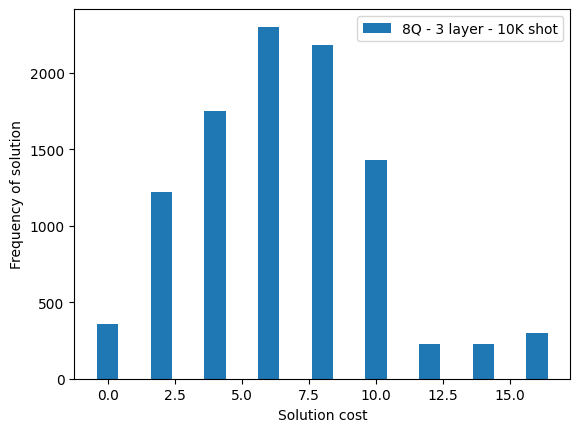

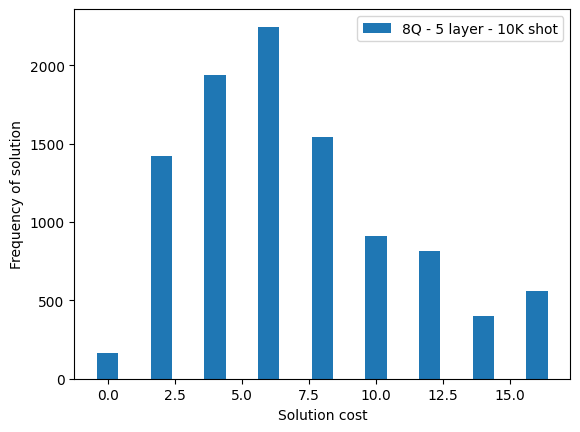

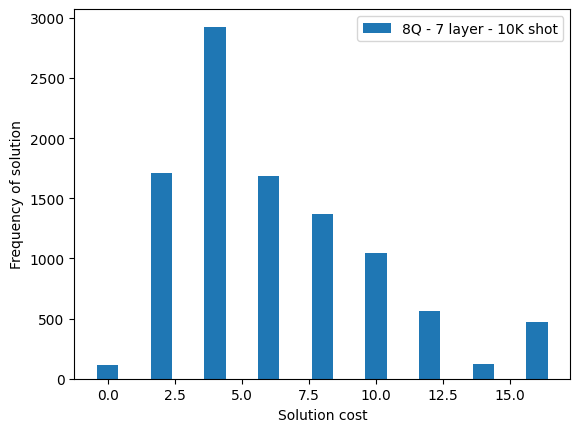

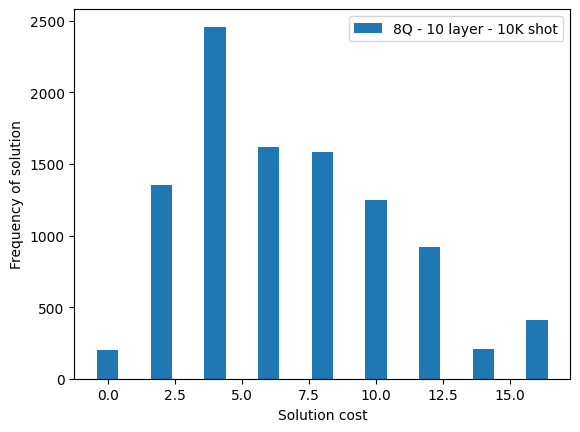

In [8]:
for layer in layers:
        x = list(xy6[layer].keys())
        y = list(xy6[layer].values())
        
        plt.figure()
        plt.bar(x, y, label=f'8Q - {layer} layer - 10K shot')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend()
        plt.savefig(save_path+f"/8_{layer}_cob_prob-solution.pdf", format='pdf')

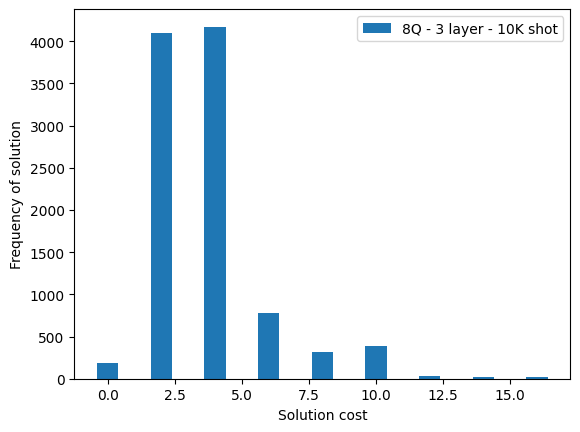

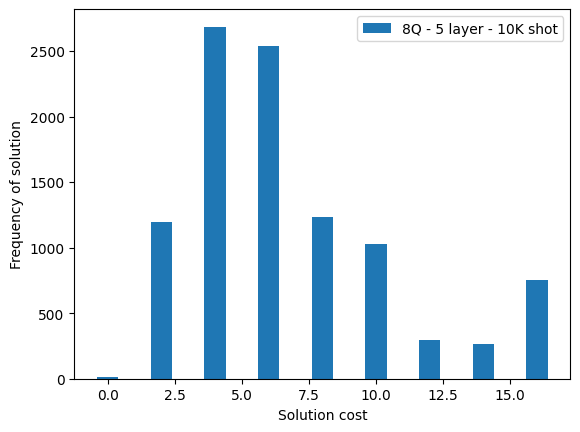

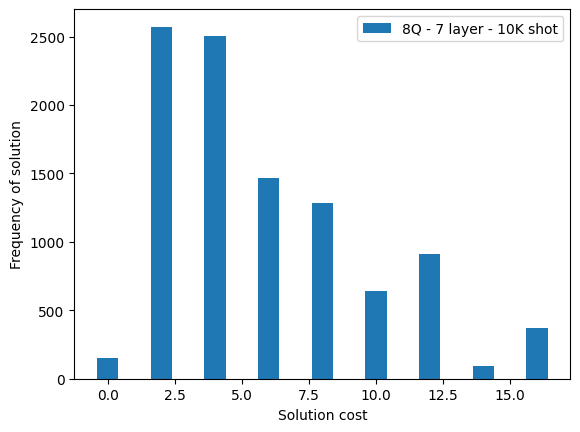

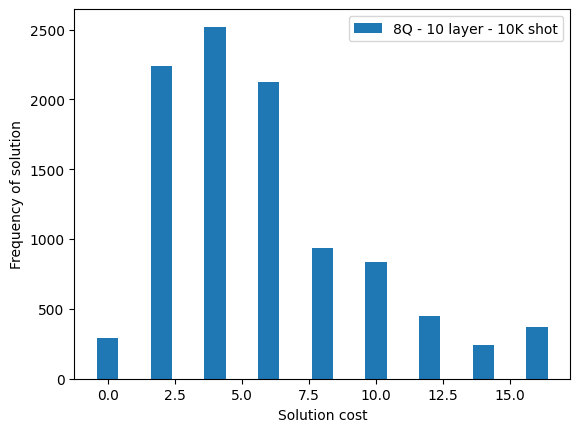

In [9]:
for layer in layers:
        x = list(xy16[layer].keys())
        y = list(xy16[layer].values())
        
        plt.figure()
        plt.bar(x, y, label=f'8Q - {layer} layer - 10K shot')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend()
        plt.savefig(save_path+f"/8_{layer}_coq_prob-solution.pdf", format='pdf')

In [10]:
xy6 = {10000: {3: 0, 5: 0, 7: 0, 10: 0}}
for i in results:
    if i['solution_cost'] == 0:
        xy6[i["shots"]][i['layers']] = i["solution_count"]/i['shots']
        
xy16 = {10000: {3: 0, 5: 0, 7: 0, 10: 0}}
for i in results16:
    if i['solution_cost'] == 0:
        xy16[i["shots"]][i['layers']] = i["solution_count"]/i['shots']


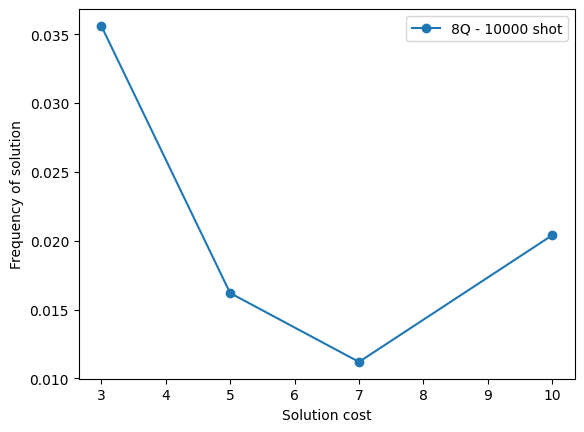

In [11]:
plt.figure()
x = list(xy6[10000].keys())
y = list(xy6[10000].values())
plt.plot(x, y, label=f'8Q - {10000} shot', ls="-", marker="o")
plt.xlabel("")
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/8_{10000}_cob_p-solution.pdf", format='pdf')


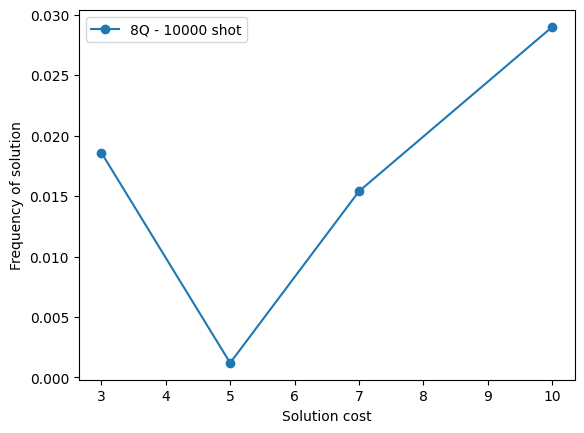

In [12]:
plt.figure()
x = list(xy16[10000].keys())
y = list(xy16[10000].values())
plt.plot(x, y, label=f'8Q - {10000} shot', ls="-", marker="o")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.savefig(save_path+f"/8_{10000}_coq_p-solution.pdf", format='pdf')


In [13]:
# 10 - 6.7878
# 7 - 6.2592
# 5 - 6.9856
# 3 - 6.5718

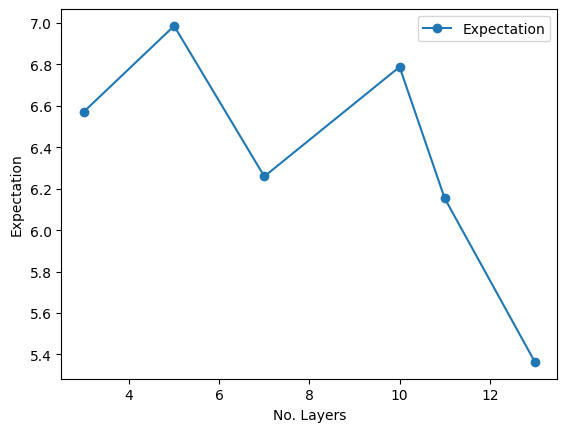

In [14]:
plt.figure()
x = list([3,5,7,10,11,13])
y = list([6.5718,6.9856,6.2592,6.7878,6.1538,5.364])
plt.plot(x, y, label=f'Expectation', ls="-", marker="o")
plt.xlabel("No. Layers")
plt.ylabel("Expectation")
plt.legend()
plt.savefig(save_path+f"/Expectation.pdf", format='pdf')


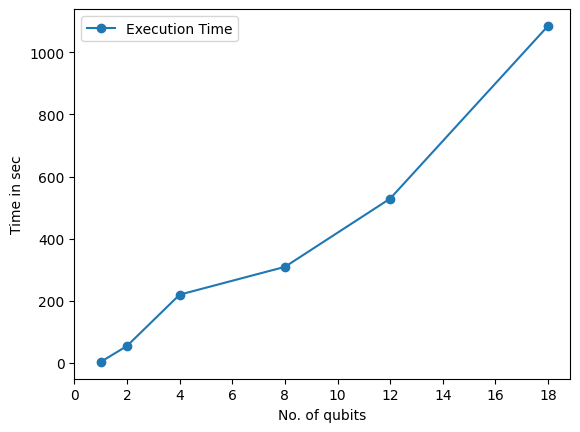

In [20]:
data = {1:3.74871039390564,2:55.1982896327972,4:220.173344373703,8:309.571194410324,12:529.139425754547,18:1084.66451931 }
plt.figure()
x = list(data.keys())
y = list(data.values())
plt.plot(x, y, label=f'Execution Time', ls="-", marker="o")
plt.xlabel("No. of qubits")
plt.ylabel("Time in sec")
plt.xticks(range(0,20,2))
plt.legend()
plt.savefig(save_path+f"/Execution.pdf", format='pdf')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


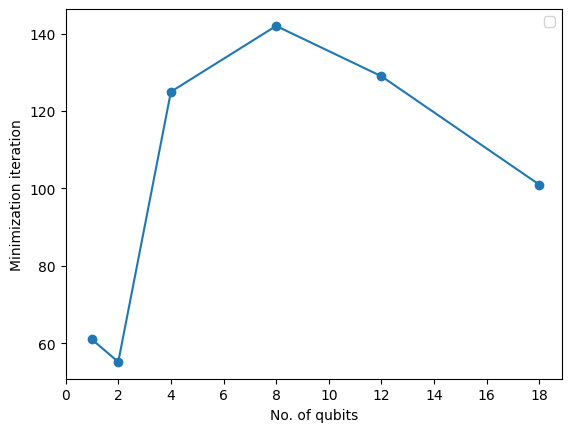

In [25]:
data_iterations = {1:61,2:55.1982896327972,4:125,8:142,12:129,18:101}
plt.figure()
x = list(data_iterations.keys())
y = list(data_iterations.values())
plt.plot(x, y, ls="-", marker="o")
plt.xlabel("No. of qubits")
plt.ylabel("Minimization iteration")
plt.xticks(range(0,20,2))
plt.legend()
plt.savefig(save_path+f"/Minimization.pdf", format='pdf')
